In [210]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
df = pd.read_csv('amount.log', sep=';', names=['datetime','value'])
df['datetime'] = pd.to_datetime(df['datetime'])
df['unix_ts'] = df['datetime'].astype(np.int64)

In [244]:
df.head()

,datetime,value,unix_ts
0,2018-04-07 10:43:32.735173,90.0,1523097812735173000
1,2018-04-07 10:43:32.745919,123.0,1523097812745919000
2,2018-04-07 10:43:32.756769,306.0,1523097812756769000
3,2018-04-07 10:43:32.767120,96.0,1523097812767120000
4,2018-04-07 10:43:32.779127,84.0,1523097812779127000


In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 0 to 9998
Data columns (total 3 columns):
datetime    9999 non-null datetime64[ns]
value       9999 non-null float64
unix_ts     9999 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 312.5 KB


In [276]:
w1 = 10           # large window (in seconds)
w2 = 1            # small window (in seconds)
step_size = 0.5

In [277]:
df.sort_values('unix_ts', inplace=True)

In [278]:
start_time = df['unix_ts'].min()
end_time = df['unix_ts'].max()

In [279]:
window_start = start_time
window_end = start_time + w2 * 10**9

In [280]:
df_shift = pd.DataFrame(columns=['time', 'mean', 'variance'])

In [281]:
while window_end < end_time:
    
    df_temp = df[(df['unix_ts'] > window_start) & (df['unix_ts'] < window_end)]
    
    df_shift = df_shift.append({'time': df_temp['datetime'].min(),
                                'mean': df_temp['value'].mean(), 
                                'variance': df_temp['value'].var()}, 
                                ignore_index=True)
    window_start = window_start + step_size * 10**9
    window_end = window_end + step_size * 10**9

In [282]:
df_shift.head()

,time,mean,variance
0,2018-04-07 10:43:32.745919,283.317073,40307.009335
1,2018-04-07 10:43:33.245750,243.182927,47674.892051
2,2018-04-07 10:43:33.740975,242.000000,56144.222222
3,2018-04-07 10:43:34.239633,279.827160,60202.044753
4,2018-04-07 10:43:34.745003,270.825000,53898.070253


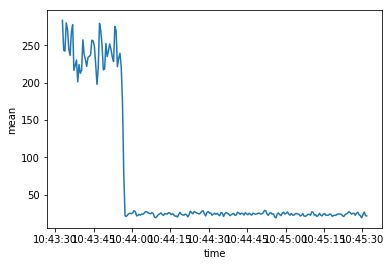

In [283]:
sns.lineplot(df_shift['time'], df_shift['mean']);

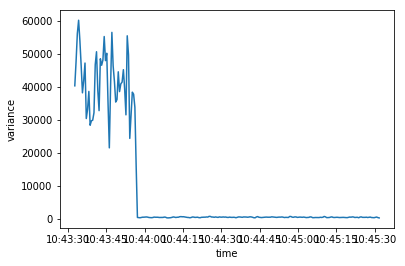

In [284]:
sns.lineplot(df_shift['time'], df_shift['variance']);